In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [9]:
a = np.array([[3,0,2],
             [2,0,-2],
             [0,1,1]], dtype = int)
a
a_inv = np.linalg.inv(a)
a_inv
a_bis = a_inv.dot(a)
a_bis

array([[ 1.00000000e+00,  0.00000000e+00, -1.11022302e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

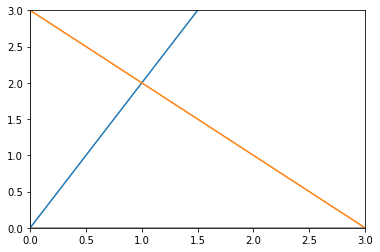

In [11]:
x = np.arange(-10,10)
y = 2 * x
y1 = -x + 3
plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0,3)
plt.ylim(0,3)
plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')
plt.show()
plt.close()

In [15]:
v = np.array([[1,1],
             [1,-3]])
a = np.array([[5,1],
             [3,3]])
lambdas = np.diag([6,2])
print(lambdas)
v_inv = np.linalg.inv(v)
print(v_inv)
print(v.dot(lambdas).dot(v_inv))
print(np.linalg.eig(a))

[[6 0]
 [0 2]]
[[ 0.75  0.25]
 [ 0.25 -0.25]]
[[5. 1.]
 [3. 3.]]
(array([6., 2.]), array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]]))


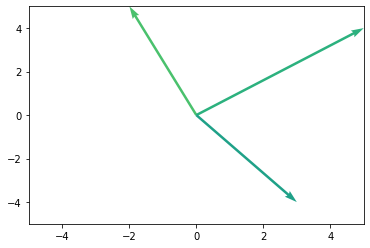

In [5]:

def plotvector(v,x,y):
    for i in v:
        plt.quiver(0, 0, i[0], i[1], np.random.randn(100),angles='xy', scale_units='xy', scale=1)
    plt.xlim(-abs(x), abs(x))
    plt.ylim(-abs(y), abs(y))
    return 

plotvector([[-2,5],[5,4],[3,-4]], 5,5)


[ 1. -1.]


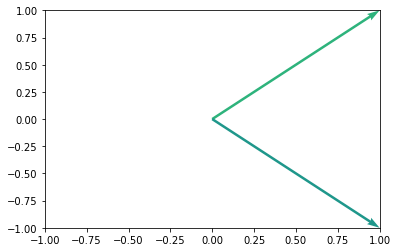

In [6]:
v = np.array([1,1])
a = np.array([[0.5,-2],
             [0.5,1]])
v1 = np.dot(v,a)
print(v1)
plotvector([[1,1],[1,-1]], 1, 1)

In [7]:
a = np.array([[1,2],
             [6,4],
             [3,2]])
np.linalg.norm(a)

8.366600265340756

[207. 208. 209. ... 192. 192. 192.]
************
[[207. 208. 209. ... 223. 223. 223.]
 [208. 208. 210. ... 223. 223. 223.]
 [208. 209. 211. ... 223. 223. 223.]
 ...
 [ 56.  61.  68. ... 198. 198. 198.]
 [ 54.  59.  65. ... 194. 194. 194.]
 [ 53.  58.  64. ... 192. 192. 192.]]


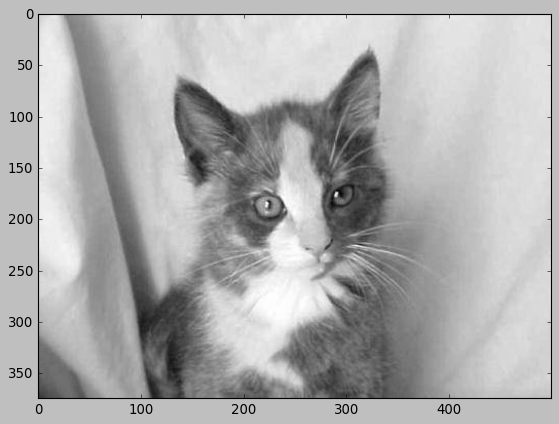

In [21]:
plt.style.use('classic')
img = Image.open('52.jpg')
imggray = img.convert('L') # 转化成灰度图片
imgmat = np.array(list(imggray.getdata(band = 0)), float)# 转化成数组形式
print(imgmat)
print("************")
imgmat.shape = (imggray.size[1], imggray.size[0]) # 更换数组形态
print(imgmat)
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [3]:
a = np.array([[7,2],
             [3,4],
             [5,3]])
u ,s ,v = np.linalg.svd(a)
print(u)
print("**********************")
print(s)
print("**********************")
print(v)

[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]
**********************
[10.25142677  2.62835484]
**********************
[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


************
(374, 374) (374,) (500, 500) (374, 500)


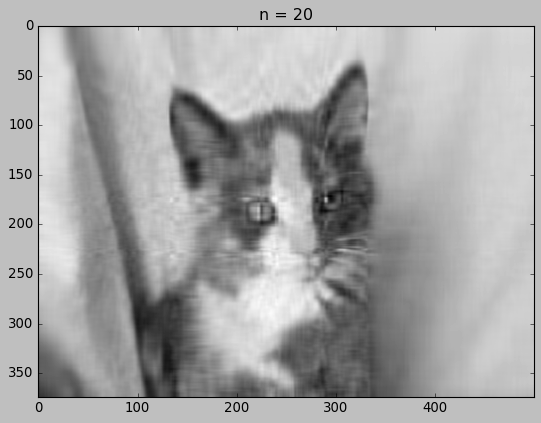

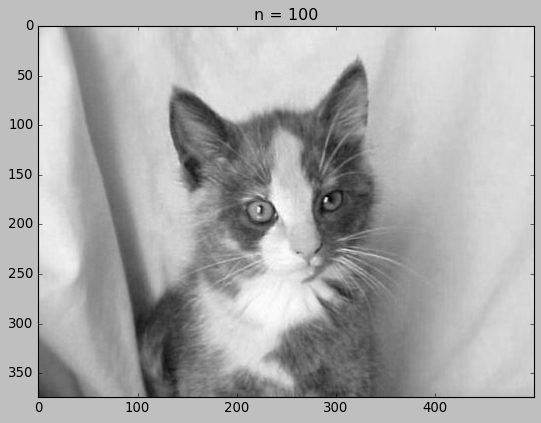

In [27]:
plt.style.use('classic')
img = Image.open('52.jpg')
imggray = img.convert('L') # 转化成灰度图片
imgmat = np.array(list(imggray.getdata(band = 0)), float)# 转化成数组形式
print("************")
imgmat.shape = (imggray.size[1], imggray.size[0]) # 更换数组形态
u, d, v = np.linalg.svd(imgmat)
#print(d)
print(u.shape,d.shape,v.shape,imgmat.shape)
for i in [5, 10, 15, 20, 30, 50, 100, 300]: # 使用 多少个奇异值
    reconstimg = np.dot(u[:,:i] * d[:i], v[:i,:])
    plt.imshow(reconstimg, cmap='gray')
    t = "n = %s" % i
    plt.title(t)
    plt.show()

In [28]:
np.random.seed(123)
x = 5 * np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100)

x = x.reshape(100,1)
y = y.reshape(100,1)

A = np.hstack((x, np.ones(np.shape(x))))
A_plus = np.linalg.pinv(A)
coefs = A_plus.dot(y)

x_line = np.linspace(0, 5, 1000)
y_line = coefs[0] * x_line + coefs[1]
plt.plot(x, y, "+")
plt.plot(x_line, y_line)
plt.show()

[3.48234593 1.43069667 1.13425727 2.75657385 3.59734485 2.1155323
 4.90382099 3.42414869 2.40465951 1.96058759 1.71589008 3.64524854
 2.19286122 0.29838948 1.99022128 3.68997703 0.91245865 0.87725878
 2.65775687 2.65913794 3.17200479 4.24715897 3.62227662 3.05511755
 3.61221691 1.61479457 1.80894328 1.14131615 1.46857023 3.15488062
 0.4605247  2.16850586 2.15431382 2.46842549 2.12915145 1.56130611
 2.13175653 4.46694582 4.72080009 2.50918338 3.11976476 0.57809198
 1.58642741 2.07413106 4.33154579 1.25227683 2.41517132 4.92779893
 2.5974256  3.06447263 0.60314333 4.131704   3.01530064 2.72534003
 1.71381917 1.52060395 2.08511106 3.40650383 4.37728421 2.55211169
 3.34656891 2.92968276 3.12451751 3.37344525 4.21171219 0.41597494
 3.81841421 1.21833187 0.9711148  2.86228479 0.47856258 4.42663413
 3.13624486 3.61708179 0.08064603 2.9721594  2.78392596 0.79479822
 0.76535258 3.47764764 1.59383213 3.45985148 2.77191625 1.94475287
 4.62566245 4.20834998 1.78698783 0.21795732 1.52384037 1.99092